# <font color=571B7E> Data Analysis Assignment Number Three - Bootstraps and Salaries </font>

In [1]:
import pandas as pd 
import seaborn as sns
import numpy as np
import tqdm as tqdm
from matplotlib import pyplot as plt

df = pd.read_csv('ds_salaries.csv')

# <font color = red>  Part One - Data Field salaries Dataset </font>

## <font color=blue> Preprocessing the Dataset </font>

Before we begin answering the questions in this assignment in order to avoid misjudgments, we should analyze the dataset we are working with.

What is the shape of the data set:

In [2]:
print(f'The data set has {df.shape[0]} rows and {df.shape[1]} columns.')

The data set has 1565 rows and 6 columns.


Are there any missing values in our dataset?

In [58]:
df.isna().sum()

experience_level    0
employment_type     0
job_title           0
salary_in_usd       0
remote_ratio        0
company_size        0
dtype: int64

It appears the dataset doesn't contain any anomalies such as missing data so it should be "safe" to operate on it.

## <font color=blue> Question One </font>  

**Based on a survey that had been carried out on feburary 2023, the ratio of americans who entirely work from home is 35%.
Under the assumption that this variable had also been measured amongst the "Data" workers in the US and had been found to be similiar:** 

**Does the csv (data file) represent well the population of the "Data" workers? Or does it countain a sub representation for workers that work entirely from home?**

**Test the claim using the variable <font color=green> remote_ratio </font> with a siginificane level of <font color=green> 0.05 </font>.**

### <font color=teal> Subquestion 1 </font>

**State the null hypothesis and the alternative hypothesis.**

Let $p$ be the precentage of workers that work entirely from home.
$$ 
H_0: p = 35\% \
$$
$$
 H_1: p \neq 35\%
$$

### <font color=teal> Subquestion 2 </font>

**What is the test statistic?**

### <font color=teal> Subquestion 3 </font>

**Write code that test the hypothesis using simulation. Write explanations for your code.**

In [4]:
employment_type = ["fully remote","not fully remote"]
prob_for_type = [0.35,0.65]
sampling_size = df.shape[0]
prob_remote_in_data = len(df[df.remote_ratio == "fully remote"])/df.shape[0]

In [5]:
def single_mean_simulation(types,prob_for_type,size,desired_type):
    new_simulated_sample = np.random.choice(employment_type, p=prob_for_type, size=size)
    count = 0
    for i in range(size):
        if new_simulated_sample[i] == desired_type:
            count += 1
    return count/size

In [6]:
def mean_simulation(types , prob_for_type, num_replications, original_sample_size , desired_type): 
    
    simulated_means = np.empty(num_replications)
    for i in range(num_replications):
        simulated_means[i] = single_mean_simulation(types,prob_for_type,original_sample_size,desired_type)

    
    return simulated_means

In [7]:
simulated_means = mean_simulation(employment_type,prob_for_type,1000,sampling_size,"fully remote")

### <font color=teal> Subquestion 4 </font>

**What is your conclusion? Present a numerative result as well as a graph depicting the test result**

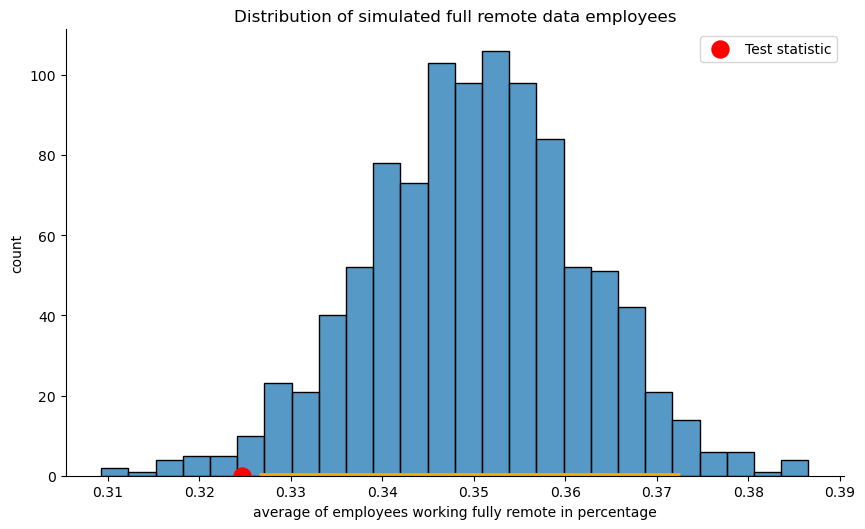

In [8]:
facetgrid_obj = sns.displot(simulated_means, stat='count',aspect = 1.75)
facetgrid_obj.axes[0, 0].scatter(prob_remote_in_data, 0, s=150, color='red')  # draw observed value
facetgrid_obj.axes[0, 0].legend(['Test statistic'])
left_end = np.percentile(simulated_means, 2.5)
right_end = np.percentile(simulated_means, 97.5)
facetgrid_obj.axes[0, 0].hlines(y=0, xmin=left_end, xmax=right_end, colors='orange', linestyles='solid', lw=5)
facetgrid_obj.set(title='Distribution of simulated full remote data employees', xlabel='average of employees working fully remote in percentage', ylabel='count')
plt.show(facetgrid_obj)

In [9]:
symmetry_axis = simulated_means.mean()
distance_from_axis = symmetry_axis - prob_remote_in_data 
symmetric_value = symmetry_axis + distance_from_axis
simulated_size = simulated_means.shape[0]
count = 0
for i in range(simulated_size):
    if(simulated_means[i] < prob_remote_in_data or simulated_means[i] > symmetric_value ):
        count += 1
print(f'Using the p-value test the p value is {count/simulated_size} which is indeed smaller than 5%. ')        

Using the p-value test the p value is 0.032 which is indeed smaller than 5%. 


As the question demanded both numerical value and a graph representation we can see based on the graph that the mean of the dataset is not inside of the confidence interval therefore we will reject the null hypothesis.
The dataset does not represent the salaries of people who work in the data field,under the assumption that on average 35% of data field related employees work entirely remotely.

## <font color=blue> Question Two </font>  

**<font color=green> Background </font>: There is a claim that Data Scientists earn in average a salary that is equal to the salary that Data Engineers clain. Test the claim based on the given data, Under the assumption that it represents well the "Data" field related jobs in the US**

### <font color=teal> Subquestion 1 </font>

**State the null hypothesis and the alternative hypothesis**

Let $d$ denote the difference between the mean salary of Data Scientists and Data Engineers.


$$ 
H_0: d = 0\ \
$$
$$
 H_1: d \neq 0\
$$

### <font color=teal> Subquestion 2 </font>

**What is the test statistic?**

### <font color=teal> Subquestion 3 </font>

**Write code that tests the hypothesis using confidence interval (with at aleast 5000 replications). Explain the code that you write.**

In [10]:
data_scientist_count = df[df['job_title'] == "Data Scientist"].shape[0]
data_engineer_count =  df[df['job_title'] == "Data Engineer"].shape[0]
print("Before answering this question lets first figure out how many engineers we have of both types.")
print(f'There are {data_scientist_count} Data Scientists in this data set.')
print(f'There are {data_engineer_count} Data Engineers in this data set.')

Before answering this question lets first figure out how many engineers we have of both types.
There are 315 Data Scientists in this data set.
There are 472 Data Engineers in this data set.


Next, we should filter out the dataset so we could more easily work on it.

In [11]:
df_DE_DS = df[(df['job_title'] == "Data Scientist") | (df['job_title'] == "Data Engineer")] 
df_DE_DS.reset_index(inplace=True) #There's no need for this line but it's nice to have.
df_DE_DS = df_DE_DS.drop(columns={'index'}) #Pandas refuses to allow inplace

The DataSet we are working on in this question:

In [12]:
df_DE_DS

,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_size
0,SE,FT,Data Scientist,147100,hybrid,M
1,SE,FT,Data Scientist,90700,hybrid,M
2,SE,FT,Data Scientist,170000,hybrid,M
3,SE,FT,Data Scientist,150000,hybrid,M
4,SE,FT,Data Engineer,253200,hybrid,M
...,...,...,...,...,...,...
782,SE,FT,Data Engineer,182000,fully remote,M
783,MI,FT,Data Scientist,130000,hybrid,M
784,MI,FT,Data Scientist,90000,hybrid,M
785,EN,FT,Data Engineer,160000,hybrid,M


In [13]:
def diff_of_avgs(df, column_name, grouping_var):
    grpby_var = df.groupby(grouping_var)
    avgs = grpby_var[column_name].mean()
    return avgs[1] - avgs[0]

def bootstrap_mean_difference(original_sample, column_name, grouping_var, num_replications):

    original_sample_size = original_sample.shape[0] # we need to replicate with the same sample size
    original_sample_cols_of_interest = original_sample[[column_name, grouping_var]]
    bstrap_mean_diffs = np.empty(num_replications)
    for i in range(num_replications):
        bootstrap_sample = original_sample_cols_of_interest.sample(original_sample_size, replace=True) # note WITH REPLACEMENT!
        resampled_mean_diff = diff_of_avgs(bootstrap_sample, column_name, grouping_var)
        bstrap_mean_diffs[i] = resampled_mean_diff
    
    return bstrap_mean_diffs

In [14]:
difference_in_salary = bootstrap_mean_difference(df_DE_DS , 'salary_in_usd','job_title',5000)

### <font color=teal> Subquestion 4 </font>

**Find confidence intervals to the paramater values you found with confidence level of 0.99 and 0.95**

In [78]:
facetgrid_obj = sns.displot(difference_in_salary, stat='count',aspect = 1.75)
facetgrid_obj.set(title='Difference in Salary between Data Scientists and Data Engineers on Average', xlabel='Average Salary Gap in USD', ylabel='count')


<font color=purple> For 95% confidence level: </font>

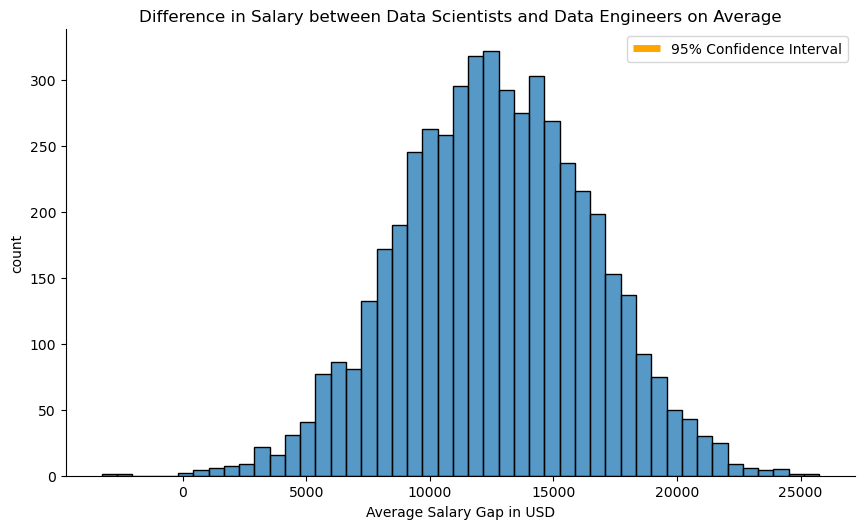

In [79]:
left_end = np.percentile(simulated_means, 2.5)
right_end = np.percentile(simulated_means, 97.5)
facetgrid_obj.axes[0, 0].hlines(y=0, xmin=left_end, xmax=right_end, colors='orange', linestyles='solid', lw=5)
facetgrid_obj.axes[0,0].legend(['95% Confidence Interval'])

plt.show(facetgrid_obj)

<font color=purple> For 99% confidence level: </font>

In [74]:
left_end = np.percentile(simulated_means, 0.5)
right_end = np.percentile(simulated_means, 99.5)
facetgrid_obj.axes[0, 0].hlines(y=0, xmin=left_end, xmax=right_end, colors='orange', linestyles='solid', lw=5)
facetgrid_obj.axes[0, 0].legend(['99% Confidence IntervaL'])
plt.show(facetgrid_obj)

### <font color=teal> Subquestion 5 </font>

**What is your conclusion? Present numerical values as well as graphs depicting the test' result for both of the mentioned confidence levels**

## <font color=blue> Question Three </font>  

**Calculate the confidence interval of confidence 95% for mean salaries of workers in medium sized companies(M). Explain the code that you wrote and explicitly display the confidence interval.**

As we did before we should first filter out the desired group, in this question it would be medium sized companies.

In [18]:
df_M_size_comp = df[df['company_size'] == "M"]
df_M_size_comp.reset_index(inplace=True)
df_M_size_comp = df_M_size_comp.drop(columns={'index'})

The Dataset in this question:

In [19]:
df_M_size_comp

,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_size
0,SE,FT,Data Scientist,147100,hybrid,M
1,SE,FT,Data Scientist,90700,hybrid,M
2,SE,FT,Data Analyst,130000,fully remote,M
3,SE,FT,Data Analyst,100000,fully remote,M
4,SE,FT,Data Modeler,147100,hybrid,M
...,...,...,...,...,...,...
1496,MI,FT,Data Analyst,100000,hybrid,M
1497,MI,FT,Data Scientist,130000,hybrid,M
1498,MI,FT,Data Scientist,90000,hybrid,M
1499,EN,FT,Data Engineer,160000,hybrid,M


In [20]:
def mean_of_target(df, column_name):
    mean = df[column_name].mean()
    return mean

def bootstrap_mean(original_sample, column_name, num_replications):
    original_sample_size = original_sample.shape[0] # we need to replicate with the same sample size
    original_sample_var_of_interest = original_sample[[column_name]]
    bstrap_means = np.empty(num_replications)
    for i in range(num_replications):
        # replace - allow or disallow sampling of the same row more than once.
        bootstrap_sample = original_sample_var_of_interest.sample(original_sample_size, replace=True) # note WITH REPLACEMENT!
        resampled_mean = bootstrap_sample.mean()
        bstrap_means[i] = resampled_mean
    
    return bstrap_means

In [21]:
sample = df_M_size_comp.sample(200,replace=True)
M_company_simulated_means =  bootstrap_mean(sample,"salary_in_usd",5000)

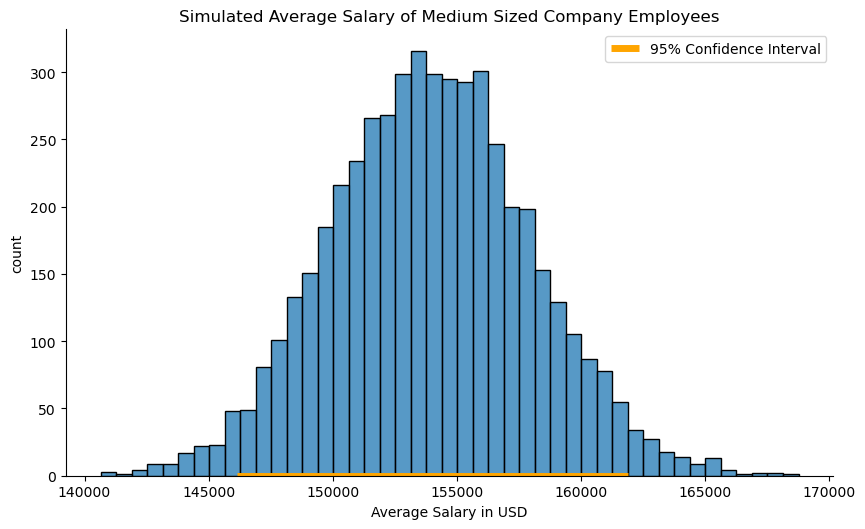

In [22]:
facetgrid_obj = sns.displot(M_company_simulated_means, stat='count',aspect = 1.75)
facetgrid_obj.set(title='Simulated Average Salary of Medium Sized Company Employees', xlabel='Average Salary in USD', ylabel='count')

left_end = np.percentile(M_company_simulated_means, 2.5)
right_end = np.percentile(M_company_simulated_means, 97.5)
facetgrid_obj.axes[0, 0].hlines(y=0, xmin=left_end, xmax=right_end, colors='orange', linestyles='solid', lw=5)
facetgrid_obj.axes[0, 0].legend(['95% Confidence Interval'])

plt.show(facetgrid_obj)

The confidence interval for the Simulated Average Salary of Medium Sized Company Employees is:

In [23]:
print(f'The lower bound is: {left_end} USD\nThe upper bound is: {right_end} USD')

The lower bound is: 146158.007 USD
The upper bound is: 161892.69337499997 USD


## <font color=blue> Question Four </font>  

<font color=green> Background </font>:**A certain financial data analysis company  would like to know what is the median that is being paid to workers in the data field. A new clumsy data analyst accidently deleted the data file. In order to find the median, he decided to create a sample and calculate its median using bootstraps. He found a file with data on employees in the data field in one of the e-mails that he recieved, without knowing that the people in the file are only employees that dont work from home completely (Hybrid). The employee picked 150 people at random from the file and asked them their salary. Since he promised a monetary compensation to those that responded, all of the people that recieved the e-mail replied back. Assume the data that was reported is true and exists in the original data file.**

### <font color=teal> Subquestion 1 </font>

**In order to test the chance the employee succeeded creating (from the sample of hybrid employees) confidence interval of 95% that contains the true median of the salary of all of the employees, run 100 simulations that sample 150 employees from the population of hybrid employees and calculates for each sample the confidence interval of confidence 95% of the median of their salary. Out of 100 confidence inervals how many of them contains the true median of the employees that work in the "data field" as it can be calculated directly from the original data?**

In [24]:
df_hybrid = df[df['remote_ratio'] == "hybrid"]
print(f'The filtered (original) dataset the employee will sample from:')
df_hybrid

The filtered (original) dataset the employee will sample from:


,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_size
2,SE,FT,Applied Scientist,222200,hybrid,L
3,SE,FT,Applied Scientist,136000,hybrid,L
4,SE,FT,Data Scientist,147100,hybrid,M
5,SE,FT,Data Scientist,90700,hybrid,M
8,EN,FT,Applied Scientist,213660,hybrid,L
...,...,...,...,...,...,...
1560,SE,FT,Machine Learning Engineer,134500,hybrid,L
1561,MI,FT,Data Scientist,130000,hybrid,M
1562,MI,FT,Data Scientist,90000,hybrid,M
1563,EN,FT,Data Engineer,160000,hybrid,M


In [28]:
def is_real_mean_in_bootstrap(real_mean,bootstrap):
    left_end = np.percentile(bootstrap, 2.5)
    right_end = np.percentile(bootstrap, 97.5)
    if ((real_mean >= left_end) and (real_mean <= right_end)):
        return 1
    else:
        return 0
    
def single_bootstrap_for_mean_salary(df, column_of_interest,bootstrap_count,sample_size):
    all_bootstraps = np.empty(bootstrap_count)
    real_mean = df[column_of_interest].mean()
    count = 0
    for i in range(bootstrap_count):
        sample = df.sample(sample_size,replace=True)
        bootstrap = bootstrap_mean(sample,"salary_in_usd",500)
        count += is_real_mean_in_bootstrap(real_mean,bootstrap)
    return count
    

In [30]:
count = single_bootstrap_for_mean_salary(df_hybrid,"salary_in_usd",100,150)

In [31]:
count

96

### <font color=teal> Subquestion 2 </font>

**The data analyst used a sample that wasn't taken at random from the same population that he is testing (but from another population). In spite of that, does the theoretical gurantee of the bootstrap method? Explain your reasoning.**

The answer depends but in general: <b> No </b>, there is no theoretical gurantee of the bootstrap method if the sample that was taken is not from the same population that the data analyst is testing. 


One of the guiding principles behind the bootstrap method is the assumption that the sample we drew represents the population we are testing. Assuming such an assumption (and other such as sufficently sized sample size) is true, we are able to indirectly draw infinetly from the original population. Which in turn, would let us find approximations about said population.

However, since the data analyst drew from a seperate population, there is no gurantee that the sample he drew represents in any form the "data related employees" , even if the data analyst drew from a subset of a data employees (as in any specific attribute) there is no gurantee it wont skew his results.

<font color=purple> Side note </font>: The slim chance the bootstrap does work is the case the second population happens to distribute exactly the same as the population he is testing. 

### <font color=teal> Subquestion 3 </font>

**How would your answers change in Subquestion A and B if the data analysis company would like to know the quarter salary of the employees working in the field (as in , instead of calculating the median , the data analyst would calculate the first quarter of the salaries). Explain your reasoning.**

<font color=purple> Hint </font>: Draw the distribution of salaries or their sum for two different employee groups.

In [48]:
salary_distribution = sns.FacetGrid(df,col="remote_ratio")

In [49]:
salary_distribution.map(sns.histplot, "salary_in_usd")

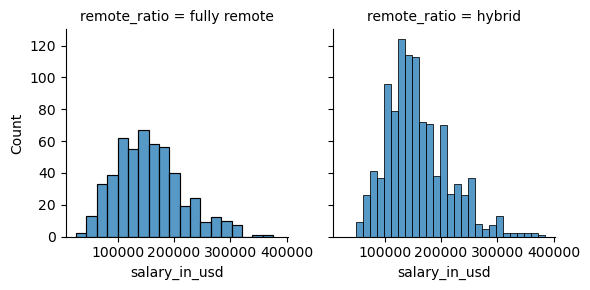

In [50]:
plt.show(salary_distribution)

# <font color = red>  Part Two - Racism in the American Judiciary System </font>

## <font color=blue> Question One </font>  

**In 2~4 short sentences explain why it is problematic to use bootstraps to calculate confidence intervals using very small sample sizes.**

As previously mentioned in <font color=teal> Part 1 - Question 4 Subquestion 2</font> the theoretical background of bootstraps rely on large sample sizes picked at random in order to simulate the distribution of the population we are attempting to test. Using small sample sizes amplifies the variance / "noise" of the sample which in turn would hinder its ability to mimic the qualities our original unreachable population has.  

## <font color=blue> Question Two </font>  

<font color=green> Background </font>: **Researchers in the US examined the effect race has on judgets's death penalty verdict during trialing a person who had been accused of murder.**

**The researchers have found there's a seems to be a difference whether or not the victim's race had been taken in consideriation or not. While considering the race of the victim, black defendee's are sentenced the death penalty more often than white people. However, when not considering the race of the victim black people are sentenced the death penalty less than white people.**

graph

### <font color=teal> Subquestion 1 </font> 

**Which statistical phenomenon could explain the gap between the results whether we consider the race of the victim and when we do not?**

The difference could be explained with the difference in the amount of sentencing per race per victim race. Considering the ratio is a simple convicted / sentenced ratio we can see that black on white murder had a high percentage of 25.7%. However, compared to white on white there had been far less instances of it occuring overall and the few that did resulted in a death verdict . The same could be said about comparing white on black against black on black, white on black murders were just not commited enough to be able to simply compare the verdict ratio.

### <font color=teal> Subquestion 2 </font>

### <font color=teal> Sub 1 of Subquestion 2 </font>

**Which tendecy of the judges could explain the gap in the results?** 

<font color=purple> Hint </font>: Which scenario would more likely result a death sentence?

There are a possible judge's tendencies that could help explain the discrepency:

(1) <font color=#DC143C> Background </font>

### <font color=teal> Sub 2 of Subquestion 2 </font>

**Which tendecy of the defendee could explain the gap in the results?** 

<font color=purple> Hint </font>: What is the relation between the race of the victim and the defendee's race?

There are a few tendencies of the defendee's that could help explain the discrepency:

(1) <font color=red> Gangcrimes </font> It could be the case that since so many of the black on black murders were gang-related and for some reason gang-related murders result in the death penalty less often.


(2) <font color=red> Robbery </font>: It could be the case that when a black person murders a white person it's a result of robbery gone wrong.As we would assume a death penalty would be the verdict only if the crime was excessively heinous it 


(3)
